<h1><center><u><i><font color="red">LetsGrowMore - Data Science Internship</color></u></i></center></h1>
<h2><center><i><font color="blue">Author: Tanushree B S</font></center></i></h2>
<hr></hr>
<h2><center>TASK 1: Iris Flowers Classification ML</center></h2>
<h2><center>BEGINNER LEVEL</center></h2>

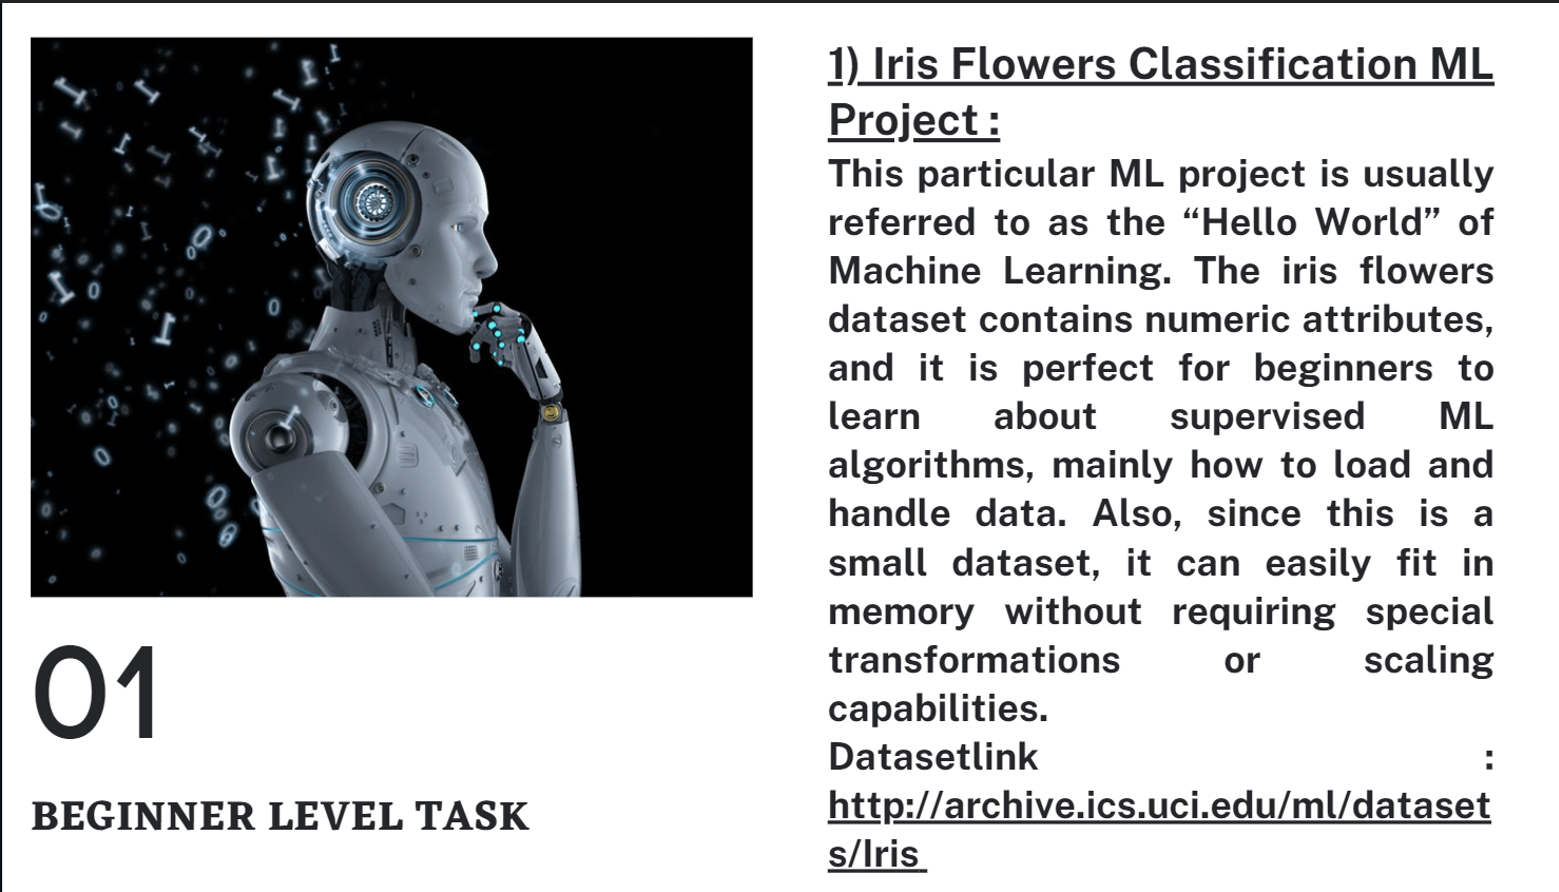

# PROBLEM STATEMENT


This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

# ABOUT IRIS DATASET

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

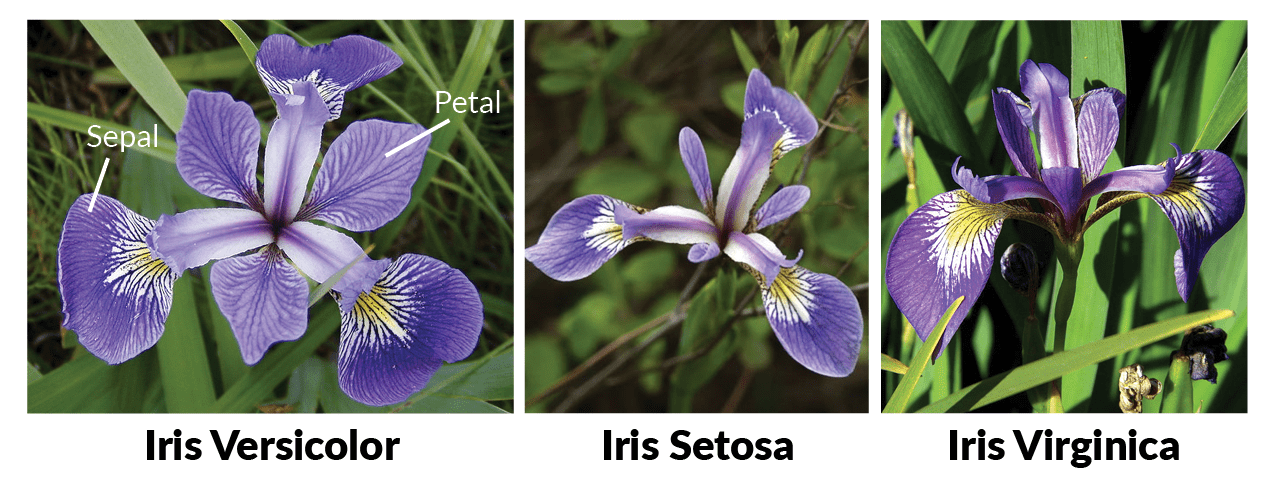

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica

# 1. Importing the dataset and required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier 
import pickle
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("IRIS (1).csv")
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

# 2.Analysing the data

In [3]:
df.head() #prints the top 5 rows of the dataset

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df.tail() #prints the last 5 rows of the dataset

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [5]:
df.shape #returns the rows and columns of dataset

(150, 5)

<b>There are totally 150 rows and 5 attributes (columns) in the total dataset</b>

In [6]:
df.describe() 

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.ndim

2

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [13]:
df.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [14]:
df.min()

sepal_length            4.3
sepal_width               2
petal_length              1
petal_width             0.1
species         Iris-setosa
dtype: object

In [15]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [16]:
print(df.duplicated().sum())
df[df.duplicated()]

3


sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica

<b>We have loaded our dataset and analysed by checking for missing values, incorrect data formats but data is free of them

But there are 3 duplicated values but dropping them might lead to imbalanced dataset.</b>

# 3.Data Visualisation

## 3.1 Scatter Plot

Scatterplot can be used with several semantic groupings which can help to understand well in a graph. They can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables while using the semantics of hue, size, and style parameters.

Text(0.5, 1.0, 'Petal length VS Petal width')

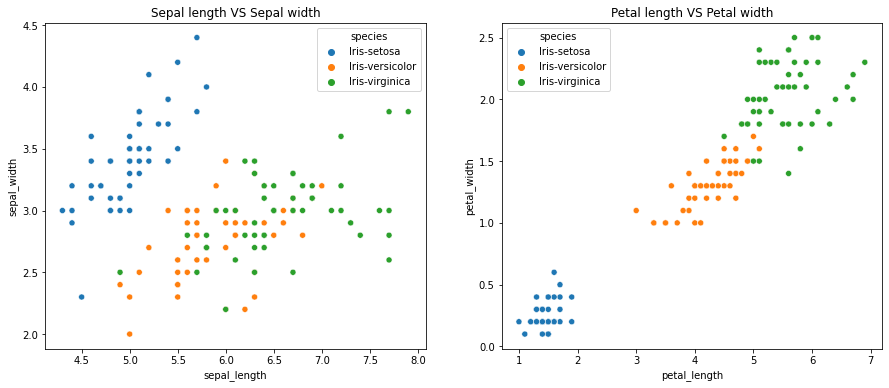

In [17]:
# visualisation between sepal length vs sepal width ; petal length vs petal width
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.scatterplot(ax=ax[0],x="sepal_length",y="sepal_width",hue='species',data=df)
sns.scatterplot(ax=ax[1],x="petal_length",y="petal_width",hue='species',data=df)
ax[0].set_title("Sepal length VS Sepal width")
ax[1].set_title("Petal length VS Petal width")

### Observations drawn:

1. From the first plot, we see that 
- <b>"Iris-setosa"</b> has smaller sepal_length and greater sepal_width
- <b>"Iris-versicolor"</b> has a everage sepal_length and sepal_width
- <b>"Iris-virginica"</b> has greater sepal_length and smaller sepal_width</b>

2. From the second plot, we see that 
- <b>"Iris-setosa"</b> has smaller petal_length and smaller sepal_width
- <b>"Iris-versicolor"</b> has a average petal_length and petal_width
- <b>"Iris-virginica"</b> has greater petal_length and greater petal_width</b>

## 3.2 Pairplot

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

                        seaborn.pairplot( data, \*\*kwargs )

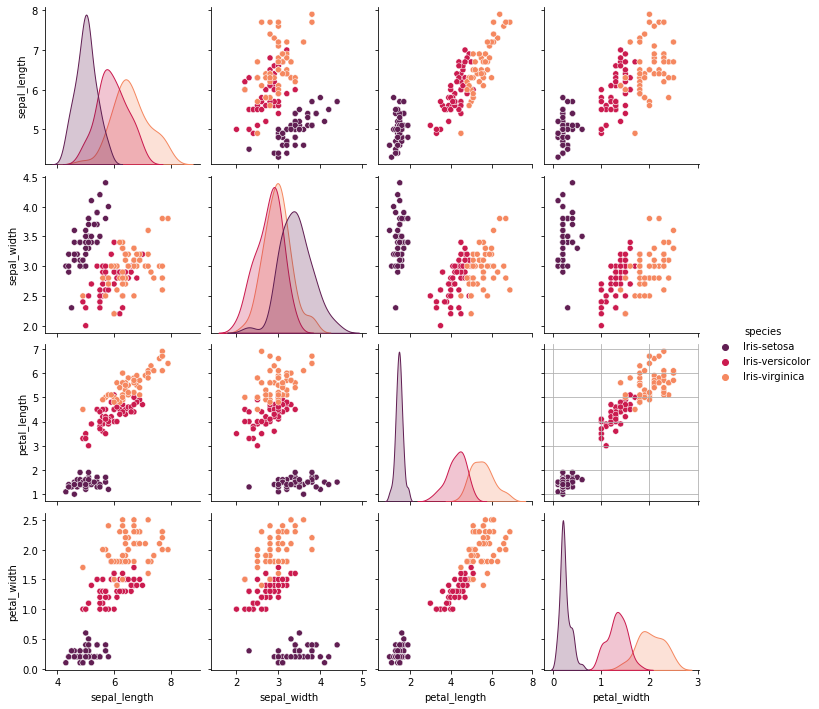

In [18]:
sns.pairplot(df,hue="species",palette="rocket")
plt.grid(True)

From the above plot we see that <b>"Iris-setosa" has been sepearted out from other two species</b>

## 3.3 Distribution plot - Box plot

Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

A box plot consist of 5 things.

- Minimum
- First Quartile or 25%
- Median (Second Quartile) or 50%
- Third Quartile or 75%
- Maximum


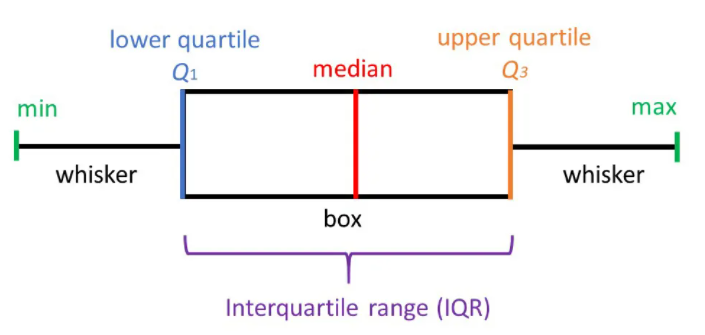

<AxesSubplot:>

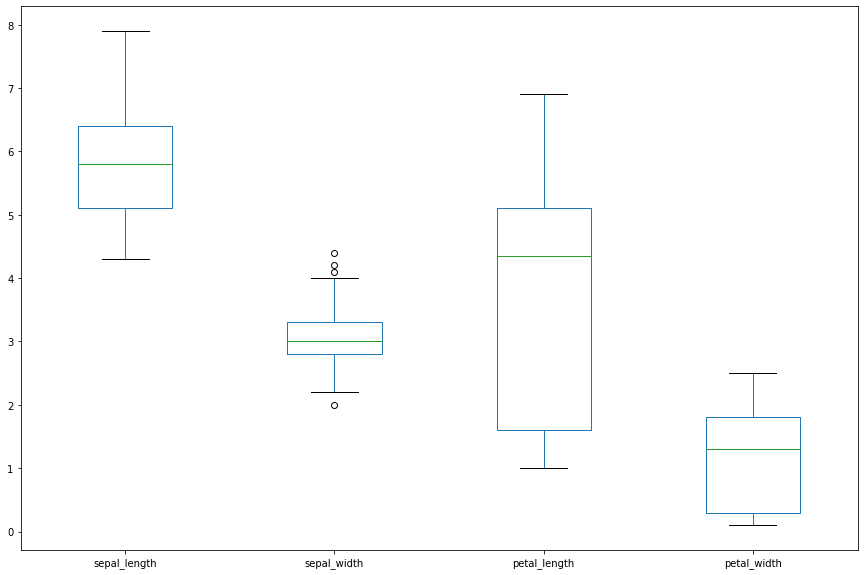

In [19]:
df.plot(kind='box',sharex=False,sharey=False,figsize=(15,10))

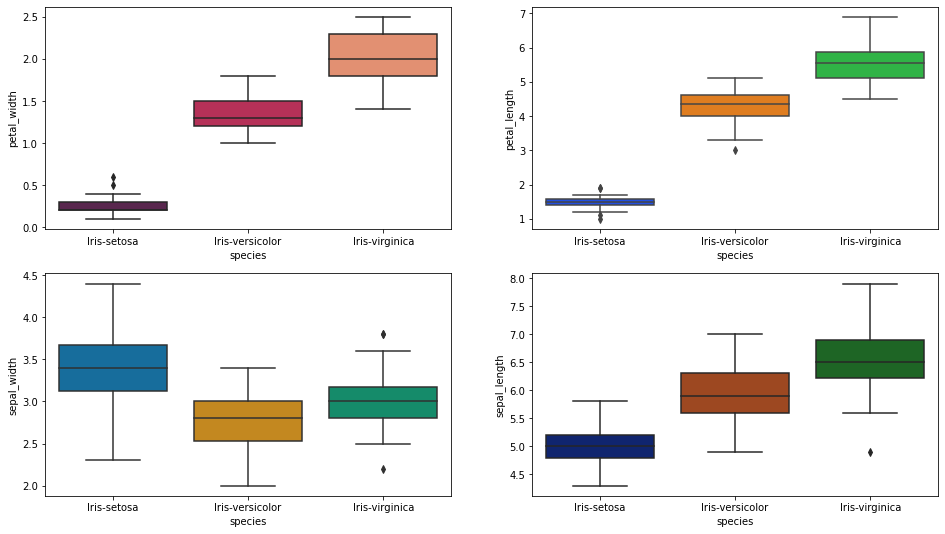

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(y="petal_width", x= "species", data=df,  orient='v' , ax=axes[0, 0],palette="rocket")
sns.boxplot(y="petal_length", x= "species", data=df,  orient='v' , ax=axes[0, 1],palette="bright")
sns.boxplot(y="sepal_width", x= "species", data=df,  orient='v' , ax=axes[1, 0],palette="colorblind")
sns.boxplot( y="sepal_length", x= "species", data=df,  orient='v' , ax=axes[1, 1],palette="dark")
plt.show()

## 3.4 Histplot

Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

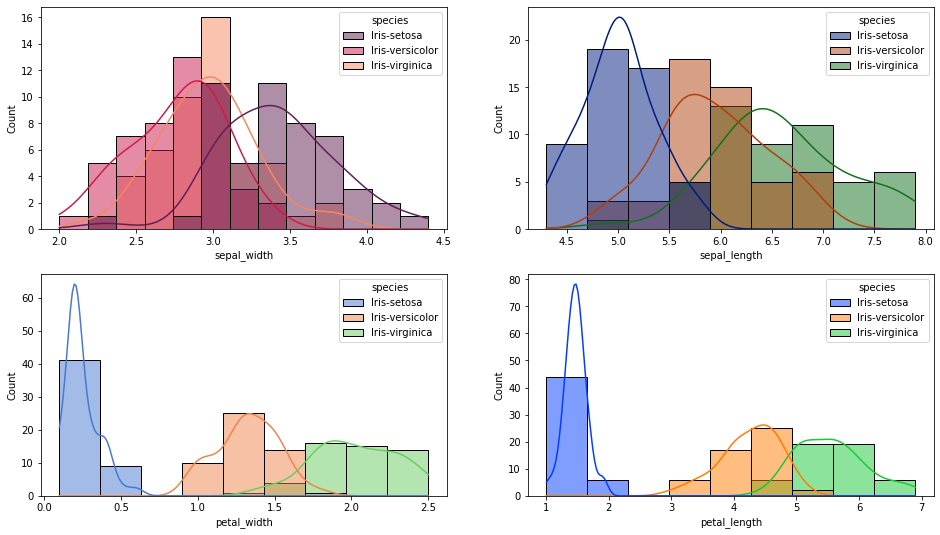

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.histplot(ax = axes[0,0],data=df,x ='sepal_width',hue='species',kde=True,palette="rocket")
sns.histplot(ax = axes[0,1],data=df,x ='sepal_length',hue='species',kde=True,palette="dark")
sns.histplot(ax = axes[1,0],data=df,x ='petal_width',hue='species',kde=True,palette="muted")
sns.histplot(ax = axes[1,1],data=df,x ='petal_length',hue='species',kde=True,palette="bright")

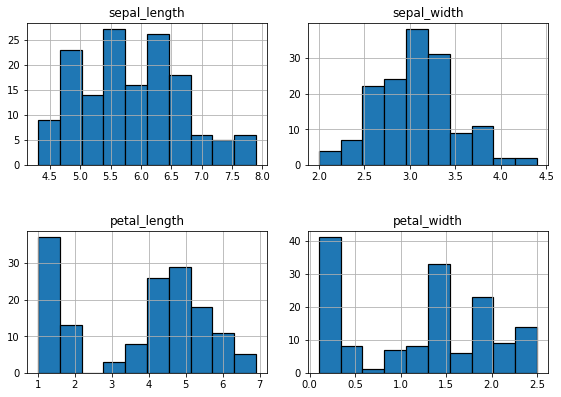

In [22]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
plt.tight_layout()
fig.set_size_inches(8,6)

## 3.5 Violinplot

A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables. It can be an effective and attractive way to show multiple data at several units.

<AxesSubplot:xlabel='species', ylabel='petal_width'>

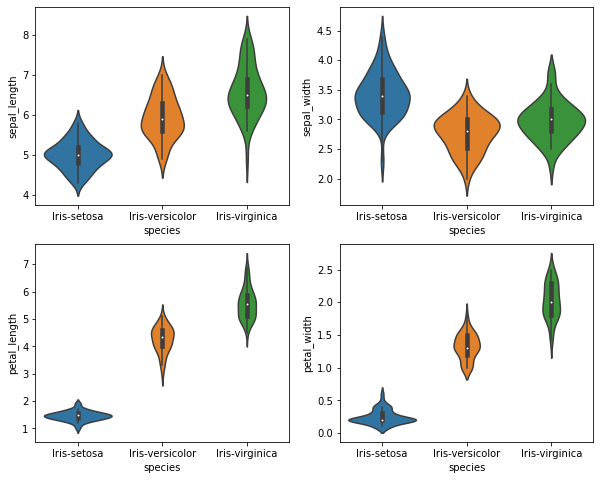

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal_length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal_width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal_length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal_width', data=df)

## 3.6 Correlation

The corr() method calculates the relationship between each column in your data set.

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

- 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

- 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

- -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

- 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

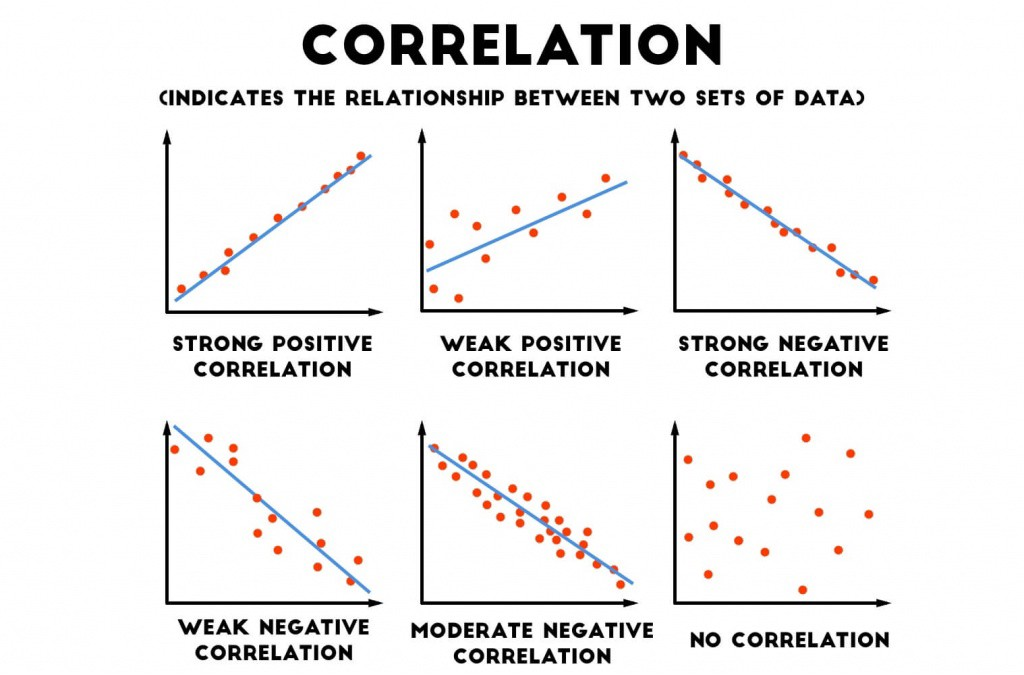

In [24]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

In [25]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

### Heatmap 
<h3>Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function.</h3>

<AxesSubplot:>

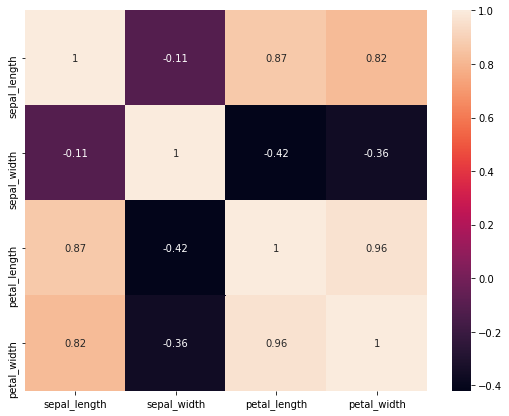

In [26]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='rocket')

### Conclusions drawn from EDA:

- The taken dataset is balanced as equal number of records are present for all three species.
- We have four numerical columns while one is just categorical column and that is our target variable
- Strong correlation is present in btw petal length and petal width as the value of correlaton is 0.96
- Iris-setosa species is most distinguishable because it sepeartes itself from other features because of its small size.
- The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
- We do have some outliers and duplicates but we have just 150 recodrs and outliers are not putting a big impact so we are not going to wrangle them.

# 4. Label Encoder of dataset

- In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human readable form, the training data is often labeled in words.


- <b>Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.</b>


- Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

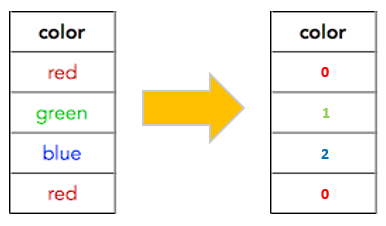

We are Label Encoding on iris dataset on the target column which is Species. It contains three species Iris-setosa, Iris-versicolor, Iris-virginica.

In [27]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])
  
df['species'].unique()

array([0, 1, 2])

In [28]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

# 5. Dividing the data into features and labels (FEATURE SELECTION)

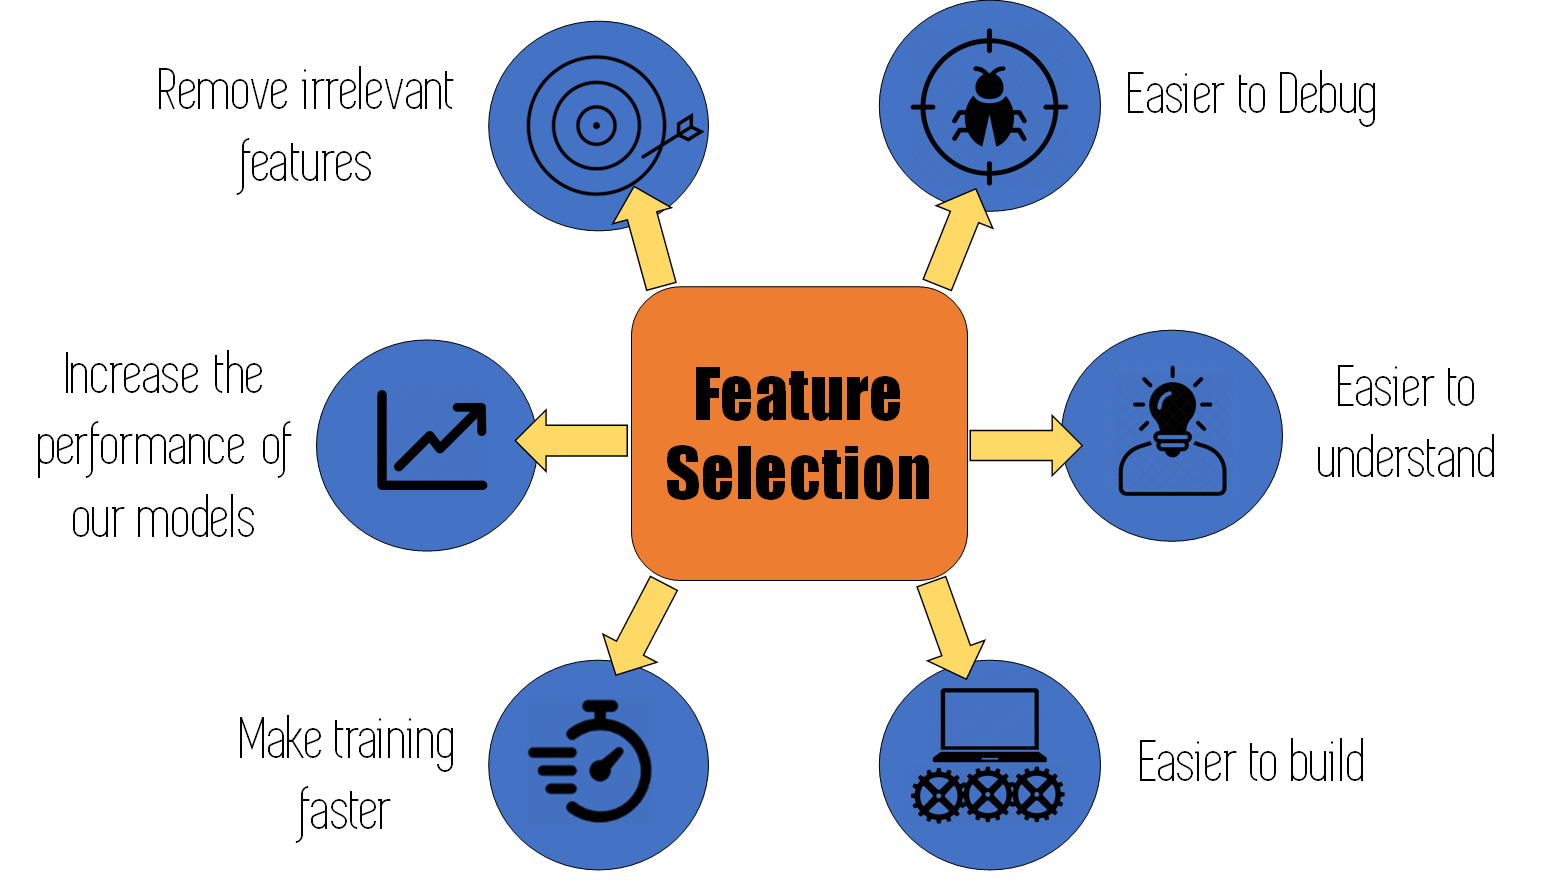

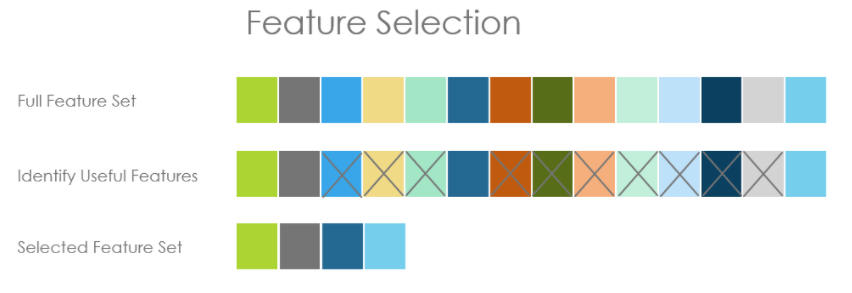

In [29]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 6. Splitting the dataset into training and testing dataset

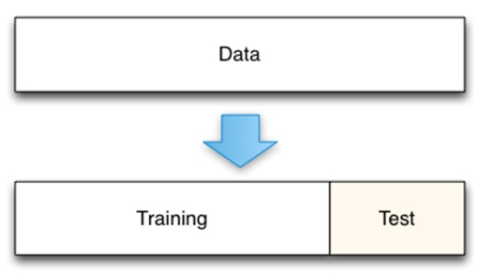

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True,random_state = 5)
# Here: traiining dataset-70% and testing dataset-30%

# 7. Data Standardisation

<b>Note:</b>


1.Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.


2.The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.


3.In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

In logistic regression, we will do <b>feature scaling because we want accurate result of predictions.</b> Here we will only scale the independent variable because dependent variable have only 0 and 1 values.

In [31]:
#feature Scaling      
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)   
X_test= st_x.transform(X_test)  

- transform() - the parameters learned by our model using the training data will help us to transform our test data.

# 8.Using different Supervised Machine Learning Models

## (a) Logistic Regression Model

- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

- Logistic regression is used for solving the classification problems.

- In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

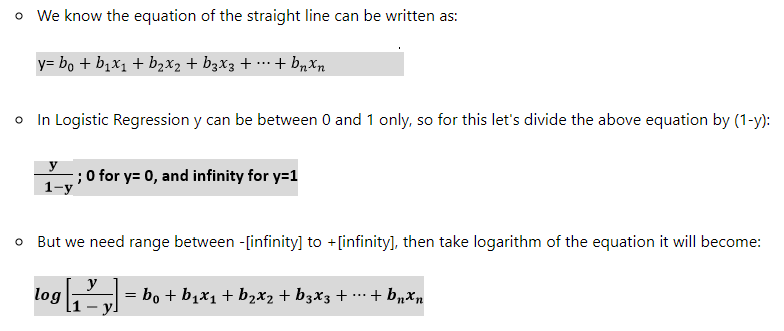

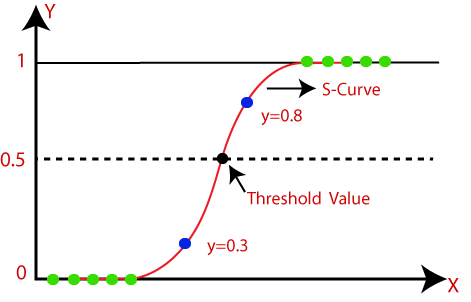

In [32]:
#Fitting Logistic Regression to the training set  
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Our model is well trained on the training set, so we will now predict the result by using test set data. Below is the code for it:

In [33]:
#Predicting the test set result  
y_pred=classifier.predict(X_test)

In the above code, we have created a y_pred vector to predict the test set result.

In [34]:
y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

- A <b>classification report</b> is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

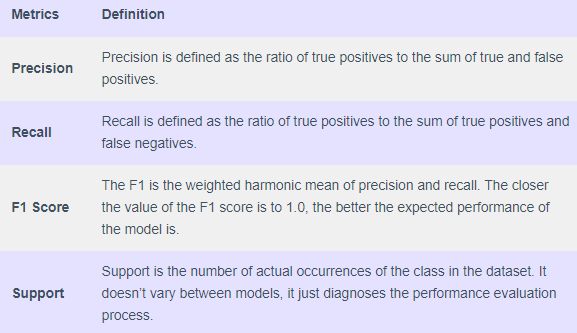

In [35]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



- A <b>Confusion matrix</b> is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

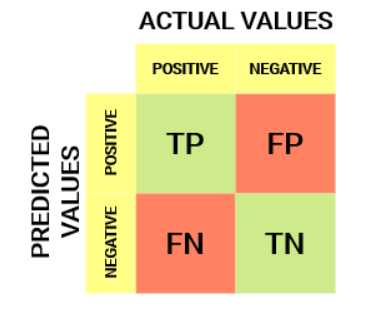

<b>True Positive (TP)</b>

- The predicted value matches the actual value
- The actual value was positive and the model predicted a positive value

<b>True Negative (TN) </b>
- The predicted value matches the actual value</b>
- The actual value was negative and the model predicted a negative value

<b>False Positive (FP) – Type 1 error</b>

- The predicted value was falsely predicted
- The actual value was negative but the model predicted a positive value
- Also known as the Type 1 error

<b>False Negative (FN) – Type 2 error</b>

- The predicted value was falsely predicted
- The actual value was positive but the model predicted a negative value
- Also known as the Type 2 error

In [36]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that:
- Main diagonals (13,15,9) gives the correct predictions.That is, the cases where the actual values and the model predictions are the same.

In [37]:
# Accuracy score
accuracy1=round(accuracy_score(y_pred,y_test)*100,2)
print('accuracy is',accuracy1,"%")

accuracy is 92.11 %


## (b) K-Nearest Neighbour Classifier

- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.


- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

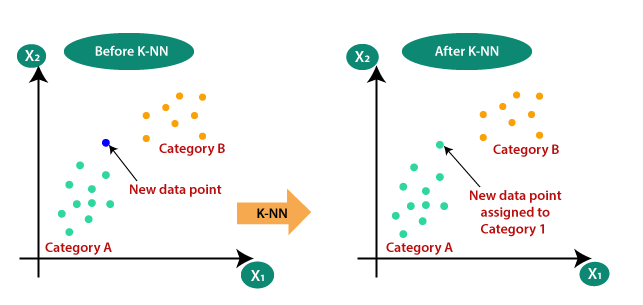

### How does K-NN work?
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready.

In [38]:
#Fitting K-NN classifier to the Training data
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier1.fit(X_train,y_train)

KNeighborsClassifier()

- <b>n_neighbors:</b> To define the required neighbors of the algorithm. Usually, it takes 5.
- <b>metric='minkowski':</b> This is the default parameter and it decides the distance between the points.
- <b>p=2:</b> It is equivalent to the standard Euclidean metric.

In [39]:
#Predicting the test set result  
y_pred1= classifier1.predict(X_test)  

In [40]:
y_pred1

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [41]:
print('accuracy is',accuracy_score(y_pred1,y_test)*100,"%")

accuracy is 94.73684210526315 %


Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

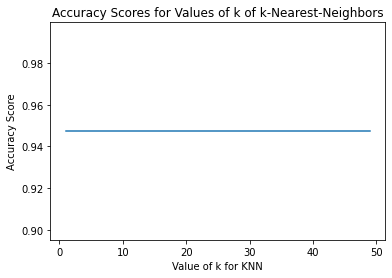

In [42]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(pd.Series(accuracy_score(y_pred1,y_test)))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')

In [43]:
classifier2=KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2 )
classifier2.fit(X_train,y_train)
prediction= classifier2.predict(X_test)  
# Accuracy score
accuracy2=round(accuracy_score(prediction,y_test)*100,2)
print('accuracy is',accuracy2,"%")

accuracy is 97.37 %


In [44]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [45]:
print(confusion_matrix(y_test, y_pred1))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


## (c) SVM - Support Vector Machine


- The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


- SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

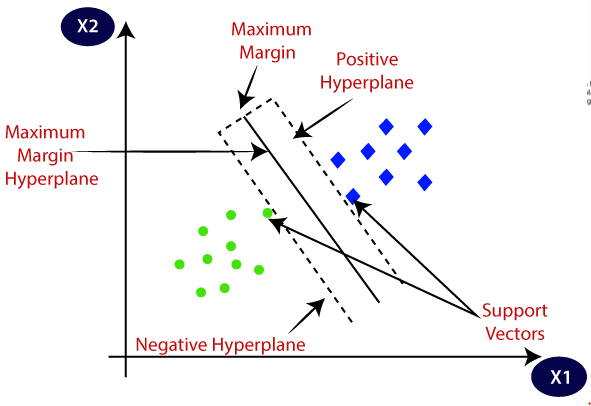

The SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane.

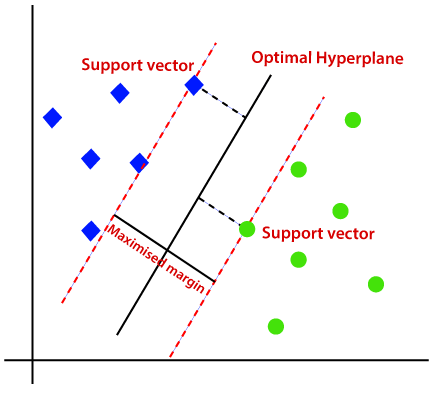

In [46]:
classifier3 = SVC(random_state=5)  
classifier3.fit(X_train, y_train)  

SVC(random_state=5)

The model performance can be altered by changing the value of C(Regularization factor), gamma, and kernel.

In [47]:
#Predicting the test set result  
y_pred3 = classifier3.predict(X_test)  

In [48]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


In [49]:
# Accuracy score
accuracy3=round(accuracy_score(y_pred3,y_test)*100,2)
print('accuracy is',accuracy3,"%")

accuracy is 94.74 %


## (d) K-Means Clustering

- K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.


- It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.


- It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

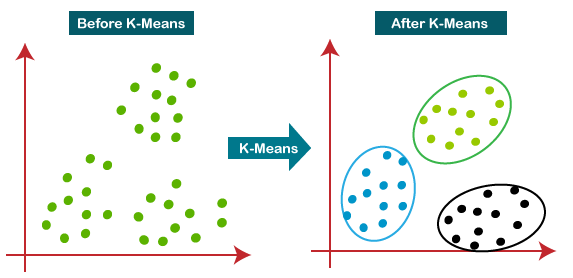

### How does the K-Means Algorithm Work?
The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.


We don't need any dependent variable for data pre-processing step as it is a clustering problem, and we have no idea about what to determine.

### Finding the optimal number of clusters using the elbow method

Text(0, 0.5, 'wcss_list')

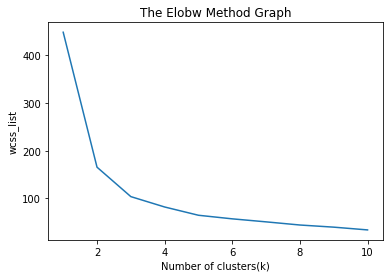

In [50]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, 
                    n_init=10, random_state= 42)  
    kmeans.fit(X_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  

<b>From the graph the elbow point is 3 and hence optimum no. of cluster is 3</b>

- We have created the wcss_list variable to initialize an empty list, which is used to contain the value of wcss computed for different values of k ranging from 1 to 10.

- Initialized the for loop for the iteration on a different value of k ranging from 1 to 10; since for loop in Python, exclude the outbound limit, so it is taken as 11 to include 10th value.

- Fitted the model on a matrix of features and then plotted the graph between the number of clusters and WCSS.

### Training the K-means algorithm on the training dataset

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 3, as we know there are 3 clusters that need to be formed. 

In [51]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans1.fit_predict(X_train)

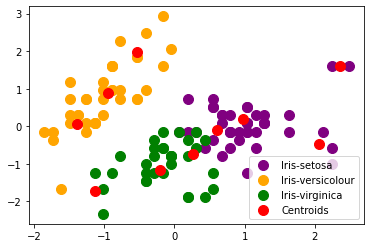

In [52]:
#Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In above lines of code, we have written code for each clusters, ranging from 1 to 3. The first coordinate of the mtp.scatter, i.e., x[y_predict == 0, 0] containing the X_train value for the showing the matrix of features values, and the y_predict is ranging from 0 to 1.

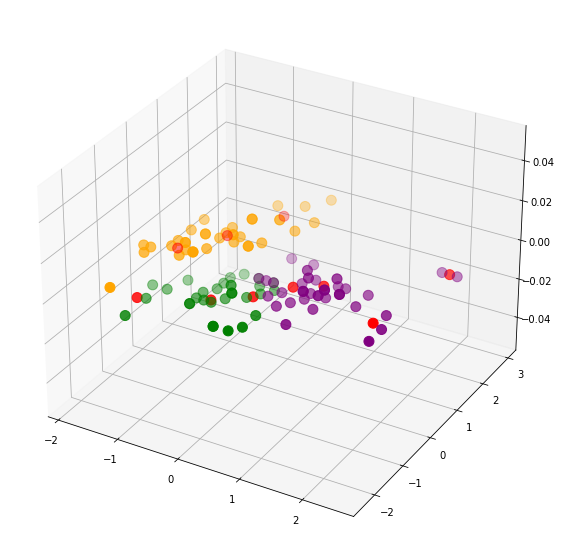

In [53]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# (e) Decision Tree Classifier

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.


- It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.


- In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

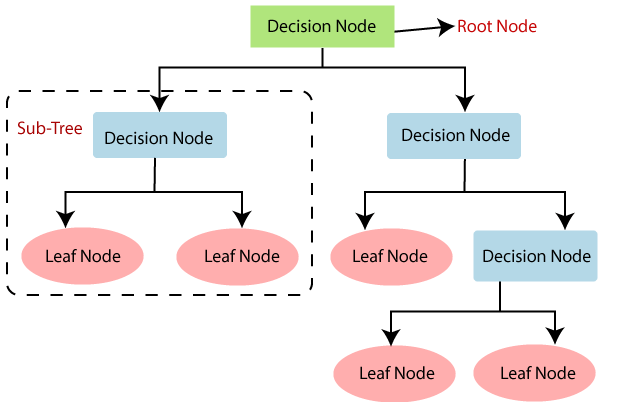

### How does the Decision Tree algorithm Work?

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.


Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).


Step-3: Divide the S into subsets that contains possible values for the best attributes.


Step-4: Generate the decision tree node, which contains the best attribute.


Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

In [54]:
classifier4 = DecisionTreeClassifier()
classifier4.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred4 = classifier4.predict(X_test)

In [56]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 12  2]
 [ 0  1 11]]


In [57]:
# Accuracy score
accuracy4=round(accuracy_score(y_pred4,y_test)*100,2)
print('accuracy is',accuracy4,"%")

accuracy is 92.11 %


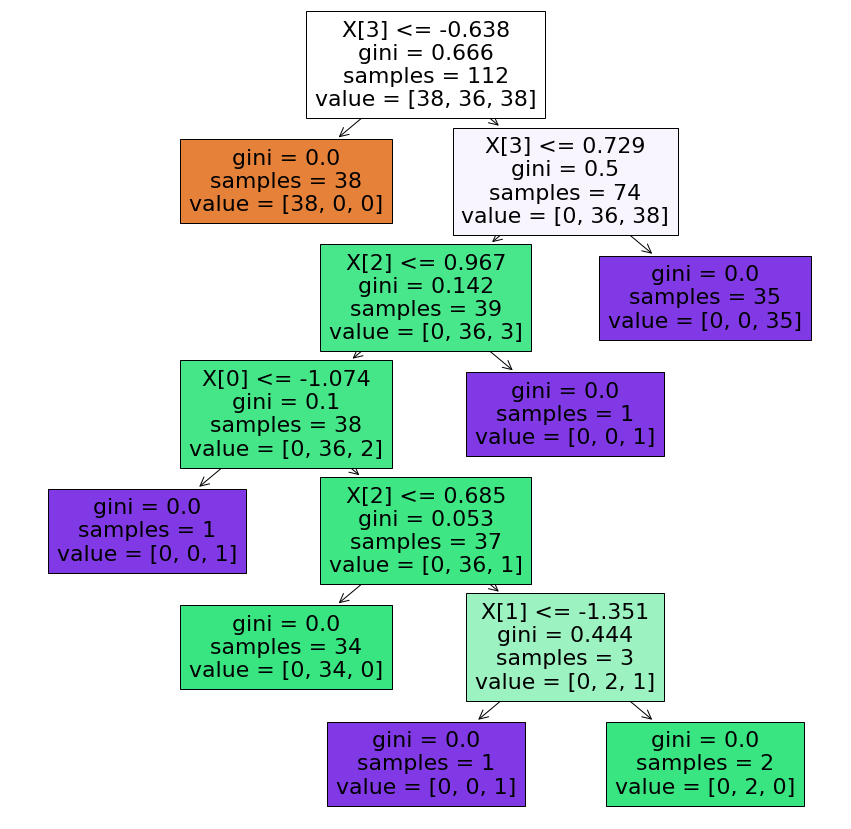

In [58]:
plt.figure (figsize=(15,15))
plot_tree(classifier4,filled= True)
print()

# (f) Random Forest Classifier

- It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


- "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."


- The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

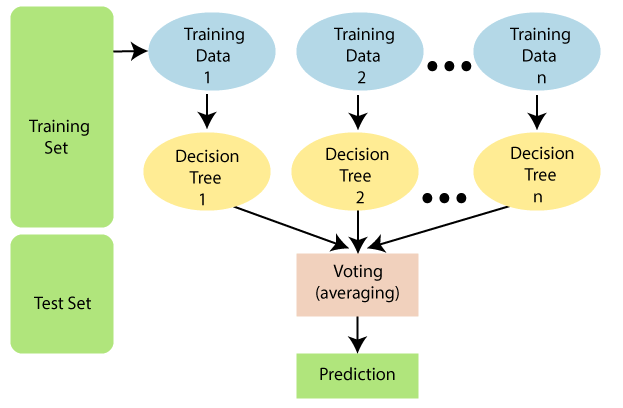

### How does Random Forest algorithm work?

Step-1: Select random K data points from the training set.

Step-2: Build the decision trees associated with the selected data points (Subsets).

Step-3: Choose the number N for decision trees that you want to build.

Step-4: Repeat Step 1 & 2.

Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

In [59]:
classifier5 = RandomForestClassifier(n_estimators= 10, criterion="entropy")  

In the above code, the classifier object takes below parameters:

- n_estimators= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.


- criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

In [60]:
y_pred5 = classifier.predict(X_test)  

In [61]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


In [62]:
# Accuracy score
accuracy5=round(accuracy_score(y_pred5,y_test)*100,2)
print('accuracy is',accuracy5,"%")

accuracy is 92.11 %


# Which is the best model ?

In [63]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'K-Nearest Neighbours',
              'Support Vector Machine (SVM)',
              'Decision Tree Classifier',
              'Random Forest'],
    "Accuracy_score":[accuracy1,
                      accuracy2,
                      accuracy3,
                      accuracy4,
                      accuracy5,
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

Model  Accuracy_score
0          K-Nearest Neighbours           97.37
1  Support Vector Machine (SVM)           94.74
2           Logistic Regression           92.11
3      Decision Tree Classifier           92.11
4                 Random Forest           92.11

In [64]:
results['Accuracy_score']

0    92.11
1    97.37
2    94.74
3    92.11
4    92.11
Name: Accuracy_score, dtype: float64

### Therefore, KNN has the highest accuracy with 97% and then SVM with 94% accuracy.

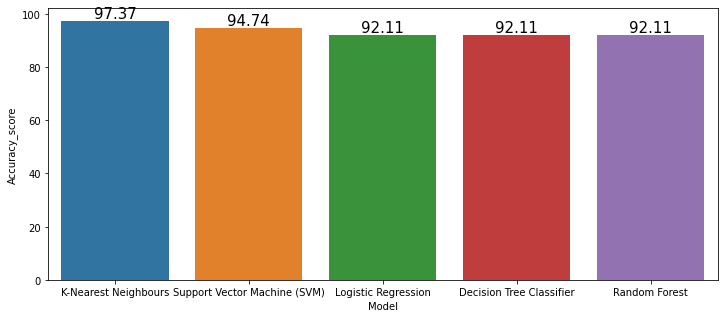

In [65]:
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

# OBSERVATIONS:

Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features.

<h1><center><i><font color="blue">Thank you !!!</font></center></h1>